In [291]:
##Clases basicas
import numpy as np

class Node:
    # Clase nodo
    def __call__(self,x):
        return self.forward(x)

    def __str__(self):
        return str(self.out)

class PreActivation(Node):
    # Pre-activación wx+b
    def __init__(self, input_size, output_size):
        self.w = np.random.uniform(0,1,input_size)
        self.b = np.random.uniform(0,1)

    def forward(self, x):
        self.input = x
        self.output = np.dot(self.input,self.w) + self.b
        return self.output

    def backward(self, grad_output):
        self.grad_input = np.dot(grad_output, self.w.T)
        self.grad_w = np.dot(self.input.T ,grad_output)
        self.grad_b = np.sum(grad_output,axis=0)
        return self  
            

class Sigmoid(Node):
    def __init__(self, node):
        self.preactivacion = node
    def forward(self,x):
        self.input = x
        self.sigmoid = 1 / (1+np.exp(-self.preactivacion.forward(x)))
        self.out = np.where(0.5 > self.sigmoid, 0, 1)
        return self
    def backward(self, grad_output):
        self.sigmoid_der = self.sigmoid * (1 - self.sigmoid)
        self.grad_input = grad_output * self.sigmoid_der
        return self.preactivacion.backward(self.grad_input)
        


class BinaryCrossEntropy(Node):
    # Error de clasificación binario
    def __init__(self, node):
        self.activación = node
    def forward(self,x,y):
        self.pred, self.y = x, y
        self.out = -y*np.log(x.sigmoid) - (1-y)*np.log(1-x.sigmoid)
        return 

    def backward(self):
        if self.y == 1:
            self.grad_input = -1/self.y
        else:
            self.grad_input = 1/1-self.y
        return self.activación.backward(self.grad_input) 


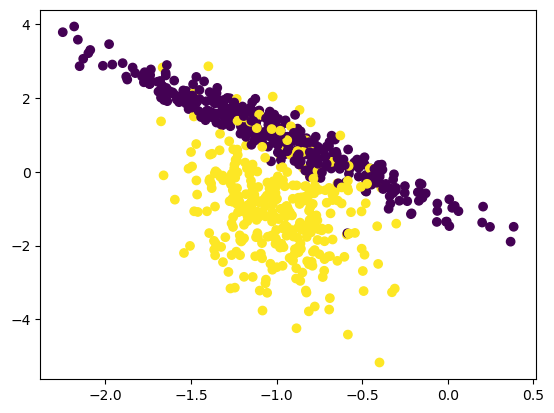

In [292]:
#Separacion de datos
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

x, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=2,
)

x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=0.3)

plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.show()

In [293]:
print(x_train.shape)

(700, 2)


In [294]:
##Linear regresion

from tqdm import tqdm

pre = PreActivation(2,1)
sig = Sigmoid(pre)
criterion = BinaryCrossEntropy(sig)

epochs = 100
lr = 0.1
for t in tqdm(range(epochs)):
    for x_i, y_i in zip(x_train, y_train):
        pred = sig.forward(x_i)
        criterion.forward(pred,y_i)
        a = criterion.backward()
        pre.w -= a.grad_w *lr
        pre.b -= a.grad_b *lr


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:01<00:00, 50.94it/s]


In [295]:
#Evaluacion
from sklearn.metrics import classification_report

y_pred = [sig.forward(x_i).out for x_i in x_eval]
print(classification_report(y_pred, y_eval))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       166
           1       0.87      1.00      0.93       134

    accuracy                           0.93       300
   macro avg       0.94      0.94      0.93       300
weighted avg       0.94      0.93      0.93       300



In [296]:
print(pre.w, pre.b)

[-16.1423071   -8.45654835] -13.75086661173599


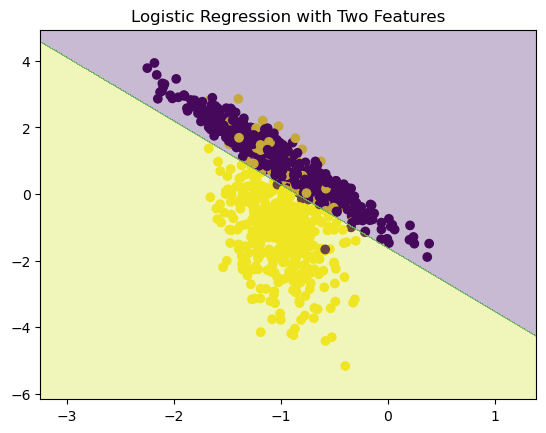

In [297]:
# Step 3: Plot the data points
plt.scatter(x[:, 0], x[:, 1], c=y)

plt.title("Logistic Regression with Two Features")

# Step 4: Plot the decision boundary
# Create a meshgrid (grid of points) to evaluate the model
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), 
                     np.linspace(y_min, y_max, 1000))

# Step 5: Use the model to predict the class for each point in the meshgrid
Z = [sig.forward(x_i).out for x_i in np.c_[xx.ravel(), yy.ravel()]]
Z = np.array(Z)
Z = Z.reshape(xx.shape)

# Step 6: Plot the decision boundary using a contour plot
plt.contourf(xx, yy, Z, alpha=0.3)

# Show the plot
plt.show()


###Ejemplo de salida


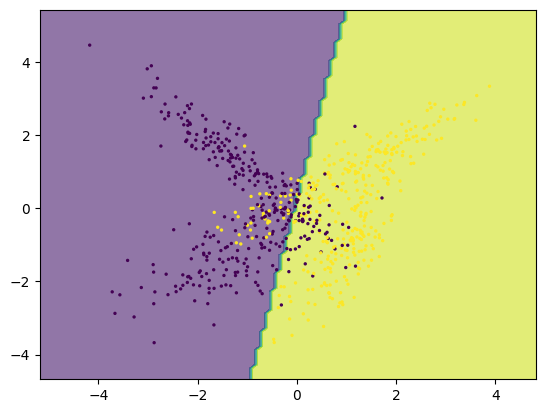

In [298]:
##Perceptron
class Perceptron(Node):
    def forward(self, x):
        if ():
            return 1
        else:
            return 0

perc = Perceptron()
y_pred =
print(classification_report(y_pred, y_eval))

SyntaxError: invalid syntax (3419762889.py, line 10)

In [ ]:
##Regresion lineal

class ?????(Node):



In [ ]:
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=1000, n_features=2, n_informative=2)
x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=0.3)

In [ ]:
?????? = ???????
?????? = ??????()

epochs = 100
lr = 0.1
for t in tqdm(range(epochs)):
    for x_i, y_i in zip(x_train, y_train):